In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($filterTypes_0:[SecurityTypeEnum!]!,$limit_1:[SecurityLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenSecurities25Yc4F:screenSecurities(filterTypes:$filterTypes_0,filterCategory:[],limit:$limit_1,first:100) {edges {node {symbol}}}}'
variables = {'filterTypes_0': ['EQUITY'], 'limit_1':[{'type':'MARKET_CAP','min':72000000000,'inclusive':True},{'type':'DIVIDEND_YIELD','min':.6,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
symbols = [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['_screenSecurities25Yc4F']['edges']]

In [2]:
quote = Quote(symbols, 50, 10)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-05-15 to 2019-07-03 - 98'

In [3]:
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 6) & (stat['shrp'] > 0.6)]
print(len(stat))
stat

39


,len,mean,std,shrp,drawdown
Symbols,,,,,
LMT,25,2.921686,1.262310,2.251683,3.150072
PFE,25,1.886397,0.822043,2.198220,1.759590
NVS,25,3.744332,1.812391,2.022173,2.148077
AMGN,25,3.557091,1.851834,1.877990,3.143341
BHP,25,4.271420,2.386612,1.756488,2.333023
ABEV,25,5.088471,2.917981,1.716634,3.941910
MRK,25,2.835810,1.617316,1.704333,2.303825
SYK,25,4.321915,2.664630,1.592172,2.457642
WMT,25,3.578053,2.222673,1.574090,1.198009


Populating the interactive namespace from numpy and matplotlib
evicted SNY 0.9211261920113608
evicted PEP 0.9487917639003033
evicted SBUX 0.9457096747910596
evicted CME 0.8092665309449065
evicted TM 0.9219682202675746
evicted HON 0.9427482922198075
evicted MDT 0.6303109133430819
evicted AZN 0.8320586186018993
evicted ABT 0.9360771373426819
evicted BUD 0.7410607126195846
evicted BHP 0.9745903813791679
evicted COST 0.8955184424848386
evicted MRK 0.8017183991058241
evicted BSBR 0.9326841383356229
evicted UL 0.7479820773683761
evicted KO 0.8629791537761037
evicted MDLZ 0.9375989039868086
evicted PFE 0.6236005868593626
evicted ABEV 0.6915260040356483
evicted NVS 0.5649854531759781
evicted LIN 0.8471002349936958
evicted C 0.8617449436964849
evicted MCD 0.7118407969314604
evicted INTC 0.8690881578389282
evicted HD 0.8655974303763677
evicted DIS 0.7820109350048206
evicted AMGN 0.8749355660221744
evicted WMT 0.8270410082012143
evicted SYK 0.7498399269724525
evicted NVO 0.6307033312217676
evicte

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,25.0,2.734100,0.329614,1.897240,2.550955,2.698692,2.938700,3.291049,8.054073,1.143802
LMT,25.0,2.921686,1.262310,0.395445,2.383392,2.867540,3.956229,5.134287,2.251683,3.150072
TD,25.0,1.944338,1.348330,-1.121764,1.028365,2.297650,3.109544,3.568155,1.383172,3.513414
BBD,25.0,6.223053,5.746228,-2.599469,1.787450,4.868694,10.847663,17.727853,1.069169,4.374995
NEE,25.0,1.524171,1.515193,-1.138727,0.657044,1.193895,2.540992,4.414510,0.953545,2.463972
CAT,25.0,3.688785,3.835755,-5.370826,1.799441,4.679663,6.550289,8.298894,0.940993,5.883743
SAP,25.0,2.947612,3.139009,-4.670435,1.505757,3.633143,4.575066,7.659969,0.913743,4.856327
ANTM,25.0,2.191448,2.900630,-2.848115,-0.050527,2.917103,4.411055,7.411565,0.728146,5.078980


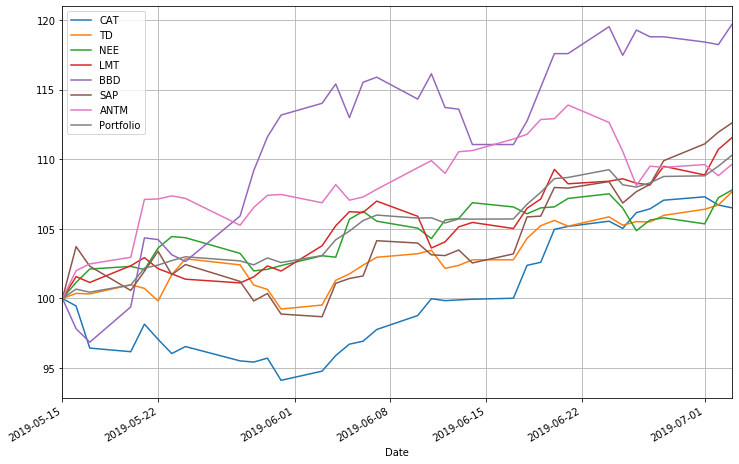

In [4]:
%pylab inline
quote.drop_mask()
ratio = quote.optimize_portfolio(stat.index)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)